In [ ]:
!wget https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/main/ACT2/DATA/diabetes.csv

--2025-07-04 02:07:19--  https://raw.githubusercontent.com/FernandoV17/IA_VERANOS/refs/heads/main/ACT2/DATA/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23105 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  22.56K  --.-KB/s    in 0.002s  

2025-07-04 02:07:19 (11.6 MB/s) - ‘diabetes.csv’ saved [23105/23105]



In [ ]:
#Si Clonaste el Respositorio
data_path = '/content/IA_VERANOS/ACT2/DATA/diabetes.csv'

In [ ]:
#Si nada mas usas google collab
data_path = '/content/diabetes.csv'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

Parte 1

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
display(
    df.head().style
    .set_caption("Tabla 1: Muestra inicial de datos")
    .set_properties(**{'text-align': 'center'})
    .format("{:.2f}", subset=df.select_dtypes(include=['float']).columns)
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [ ]:
df_processed = df.copy()


Análisis de valores nulos en el dataset:


,Conteo Nulos
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0



Valores cero en columnas clave:


,Conteo Ceros
Pregnancies,111
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,500


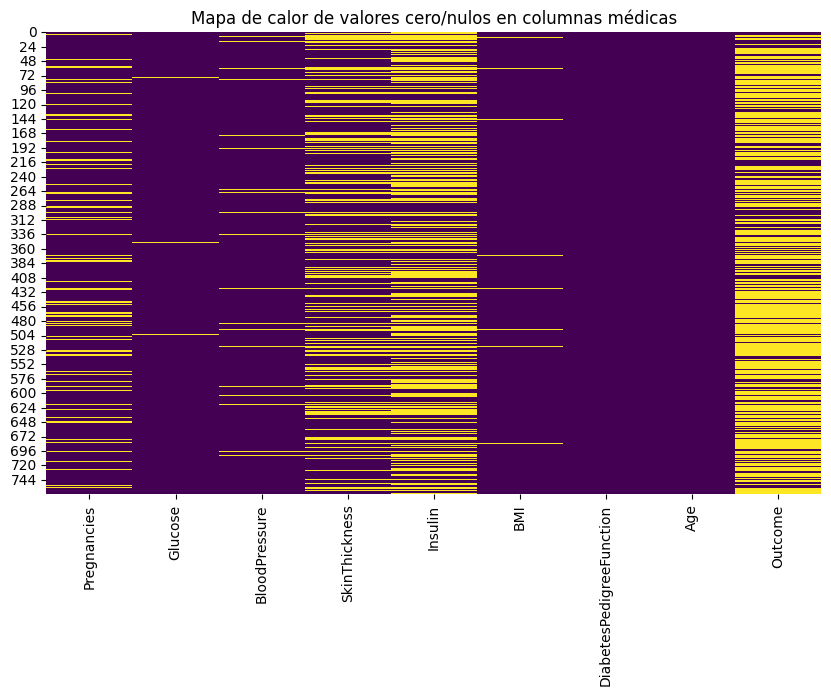


Filas con valores nulos o ceros problemáticos:

--- Pregnancies ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
16,0,118,84,47,230,45.8,0.551,31,1
45,0,180,66,39,0,42.0,1.893,25,1
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0



--- Glucose ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1



--- BloodPressure ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1



--- SkinThickness ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0



--- Insulin ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0



--- BMI ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0



--- Outcome ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0


In [ ]:
print("\nAnálisis de valores nulos en el dataset:")
null_analysis = df.isnull().sum().to_frame('Conteo Nulos')
display(null_analysis.style.set_caption("Conteo de valores nulos por columna"))

key_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("\nValores cero en columnas clave:")
zero_analysis = df.select_dtypes(include=['int', 'float']).isin([0]).sum().to_frame('Conteo Ceros')
display(zero_analysis.style.set_caption("Conteo de valores cero en columnas numéricas"))

plt.figure(figsize=(10, 6))
sns.heatmap(df[key_columns].isin([0, np.nan]), cmap='viridis', cbar=False)
plt.title("Mapa de calor de valores cero/nulos en columnas médicas")
plt.show()

print("\nFilas con valores nulos o ceros problemáticos:")
for col in key_columns:
    zero_or_null = df[df[col].isin([0, np.nan])]
    if not zero_or_null.empty:
        print(f"\n--- {col} ---")
        display(zero_or_null.head())

Parte 2

In [ ]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
print("Columnas numéricas identificadas:", numeric_cols)

df_clean = df.copy()

for col in numeric_cols:
    col_median = df_clean[df_clean[col] != 0][col].median()
    # Replace zeros with median
    df_clean[col] = df_clean[col].replace(0, col_median)

    print(f"Replaced zeros in {col} with median value: {col_median:.2f}")

Columnas numéricas identificadas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Replaced zeros in Pregnancies with median value: 4.00
Replaced zeros in Glucose with median value: 117.00
Replaced zeros in BloodPressure with median value: 72.00
Replaced zeros in SkinThickness with median value: 29.00
Replaced zeros in Insulin with median value: 125.00
Replaced zeros in BMI with median value: 32.30
Replaced zeros in DiabetesPedigreeFunction with median value: 0.37
Replaced zeros in Age with median value: 29.00
Replaced zeros in Outcome with median value: 1.00


VERIFICACIÓN DE CEROS RESTANTES
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0

Total de ceros restantes: 0
ESTADÍSTICAS DESCRIPTIVAS


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.0
mean,4.42,121.66,72.39,29.11,140.67,32.46,0.47,33.24,1.0
std,2.98,30.44,12.10,8.79,86.38,6.88,0.33,11.76,0.0
min,1.00,44.00,24.00,7.00,14.00,18.20,0.08,21.00,1.0
25%,2.00,99.75,64.00,25.00,121.50,27.50,0.24,24.00,1.0
50%,4.00,117.00,72.00,29.00,125.00,32.30,0.37,29.00,1.0
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.0
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.0


DISTRIBUCIÓN DE VARIABLES


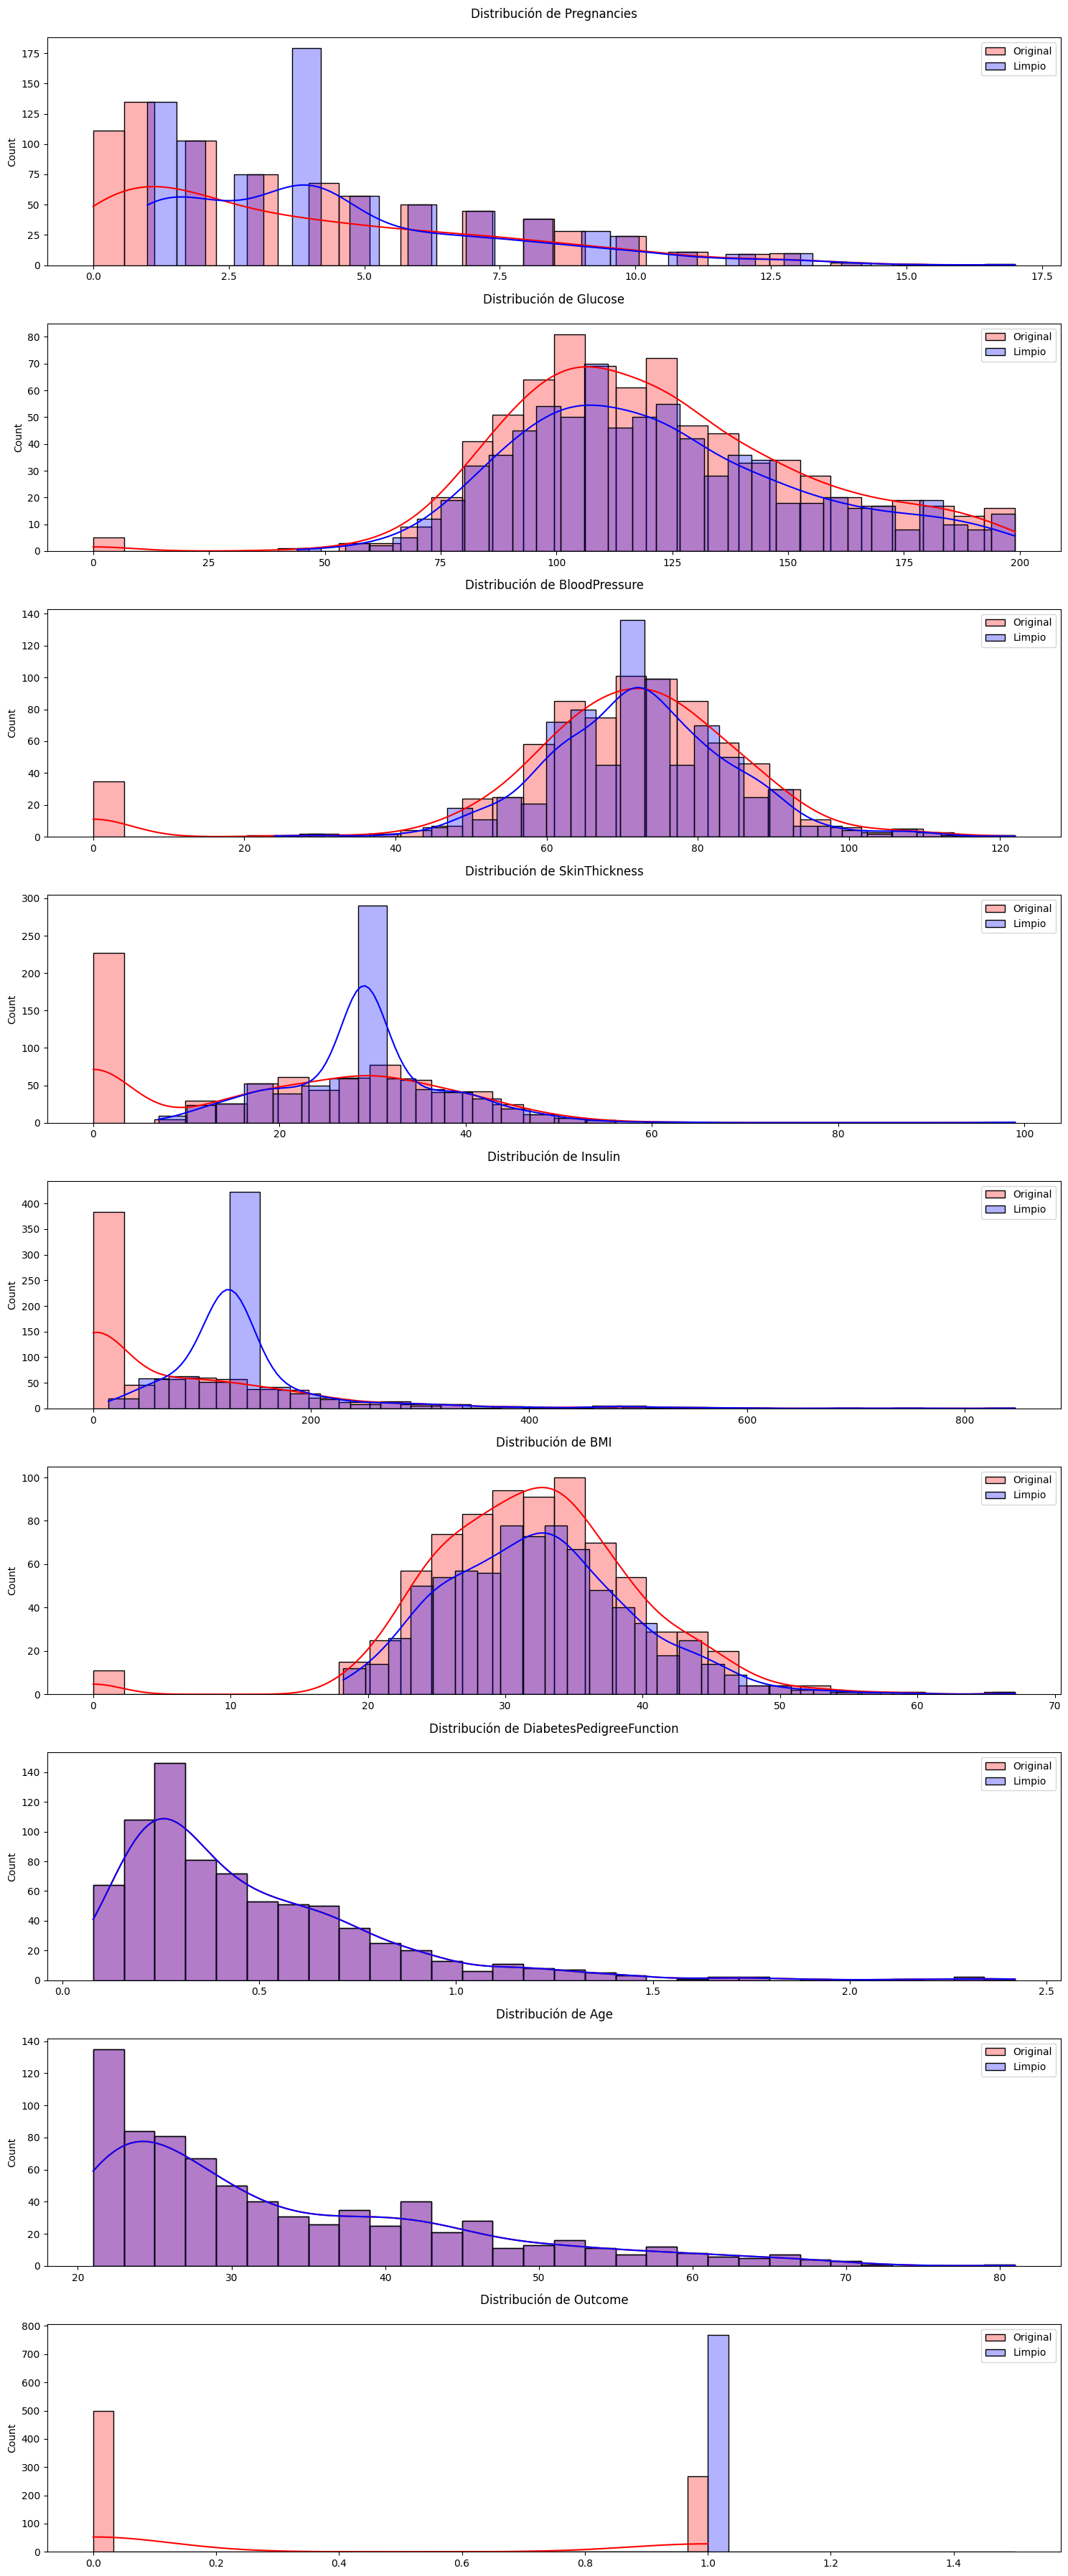

In [ ]:
columnas_a_excluir = []

numeric_cols_clean = [col for col in df_clean.select_dtypes(include=['int', 'float']).columns
                    if col not in columnas_a_excluir]


print("VERIFICACIÓN DE CEROS RESTANTES")
ceros_restantes = (df_clean[numeric_cols_clean] == 0).sum()
print(ceros_restantes.to_string(name="Ceros remanentes"))
print(f"\nTotal de ceros restantes: {ceros_restantes.sum()}")

print("ESTADÍSTICAS DESCRIPTIVAS")
display(df_clean[numeric_cols_clean].describe().round(2))

print("DISTRIBUCIÓN DE VARIABLES")
plt.figure(figsize=(15, len(numeric_cols_clean)*4))
for i, col in enumerate(numeric_cols_clean, 1):
    plt.subplot(len(numeric_cols_clean), 1, i)
    sns.histplot(df[col], color='red', kde=True, alpha=0.3, label='Original', bins=30)
    sns.histplot(df_clean[col], color='blue', kde=True, alpha=0.3, label='Limpio', bins=30)
    plt.title(f'Distribución de {col}', pad=20)
    plt.legend()
    plt.xlabel('')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols_clean = [col for col in df_clean.select_dtypes(include=['int', 'float']).columns
                    if col not in columnas_a_excluir]

print("COLUMNAS NUMÉRICAS IDENTIFICADAS")
print(numeric_cols_clean)

scaler = MinMaxScaler()
df_clean[numeric_cols_clean] = scaler.fit_transform(df_clean[numeric_cols_clean])

print("PRIMERAS FILAS POST-NORMALIZACIÓN")
display(df_clean.head().style.set_caption("Dataset Normalizado").format("{:.4f}"))

print("ESTADÍSTICAS DESCRIPTIVAS POST-NORMALIZACIÓN")
display(df_clean[numeric_cols_clean].describe().round(4).style.set_caption("Resumen Estadístico"))

COLUMNAS NUMÉRICAS IDENTIFICADAS
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
PRIMERAS FILAS POST-NORMALIZACIÓN


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.3125,0.6710,0.4898,0.3043,0.1334,0.3149,0.2344,0.4833,0.0000
1,0.0000,0.2645,0.4286,0.2391,0.1334,0.1718,0.1166,0.1667,0.0000
2,0.4375,0.8968,0.4082,0.2391,0.1334,0.1043,0.2536,0.1833,0.0000
3,0.0000,0.2903,0.4286,0.1739,0.0962,0.2025,0.0380,0.0000,0.0000
4,0.1875,0.6000,0.1633,0.3043,0.1851,0.5092,0.9436,0.2000,0.0000


ESTADÍSTICAS DESCRIPTIVAS POST-NORMALIZACIÓN


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.213900,0.501000,0.493700,0.240300,0.152200,0.291500,0.168200,0.204000,0.000000
std,0.186300,0.196400,0.123400,0.095600,0.103800,0.140600,0.141500,0.196000,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.359700,0.408200,0.195700,0.129200,0.190200,0.070800,0.050000,0.000000
50%,0.187500,0.471000,0.489800,0.239100,0.133400,0.288300,0.125700,0.133300,0.000000
75%,0.312500,0.621000,0.571400,0.271700,0.136100,0.376300,0.234100,0.333300,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


Parte 3

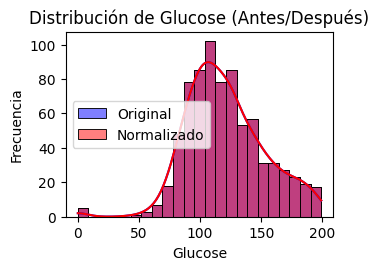

In [ ]:
#Histograma
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue', label='Original', alpha=0.5)
sns.histplot(df_processed['Glucose'], kde=True, color='red', label='Normalizado', alpha=0.5)
plt.title('Distribución de Glucose (Antes/Después)')
plt.xlabel('Glucose')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()

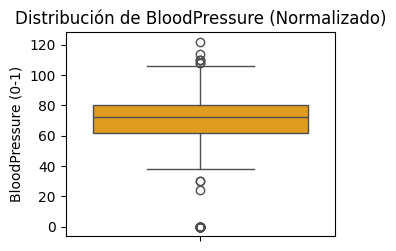

In [ ]:
#Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(y=df_processed['BloodPressure'], color='orange')
plt.title('Distribución de BloodPressure (Normalizado)')
plt.ylabel('BloodPressure (0-1)')
plt.tight_layout()
plt.show()

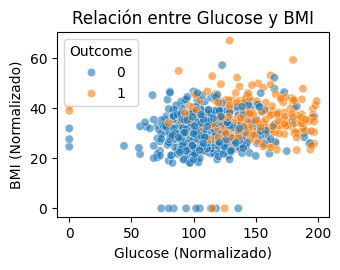

In [ ]:
#Scatter
plt.subplot(2, 2, 3)
sns.scatterplot(x=df_processed['Glucose'], y=df_processed['BMI'], hue=df_processed['Outcome'], alpha=0.6)
plt.title('Relación entre Glucose y BMI')
plt.xlabel('Glucose (Normalizado)')
plt.ylabel('BMI (Normalizado)')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-2501770350.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=['green', 'red'])


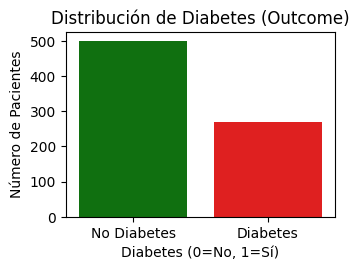

In [ ]:
#Bar Chart patients vs diabetes
plt.subplot(2, 2, 4)
outcome_counts = df['Outcome'].value_counts()
sns.barplot(x=outcome_counts.index, y=outcome_counts.values, palette=['green', 'red'])
plt.title('Distribución de Diabetes (Outcome)')
plt.xlabel('Diabetes (0=No, 1=Sí)')
plt.ylabel('Número de Pacientes')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.tight_layout()
plt.show()